In [77]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from statsmodels.tsa.stattools import grangercausalitytests

# Import Data

In [78]:
data = pd.read_csv('./data_sunrun_RUN.csv')
data['date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('date', inplace=True)
data.drop('Date', axis=1, inplace=True)

# Import Data Normalized

In [79]:
data_normalized =  pd.read_csv('./data_sunrun_RUN_normalized.csv')

# Lag Analysis

In [117]:
max_lag = 100

In [118]:
def plot_cross_correlation(series_1, series_2, max_lag):
    fig, ax1 = plt.subplots(figsize = (18,5))
    ax1.xcorr(series_1, series_2, usevlines = True, maxlags = max_lag, normed=True)
    ax1.grid(True)
    plt.show()

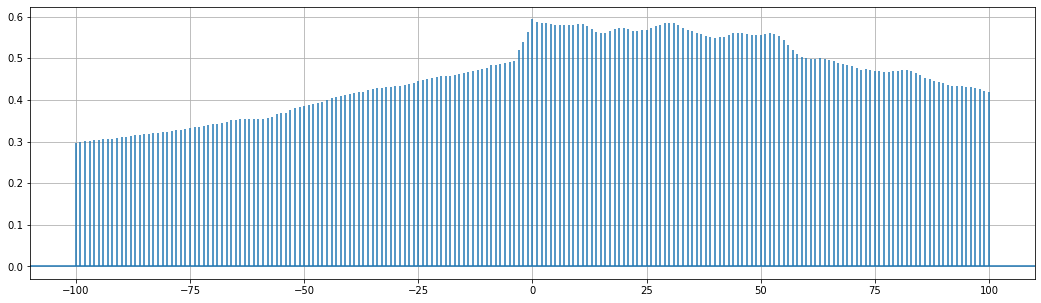

In [119]:
series_1 = data['pos_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

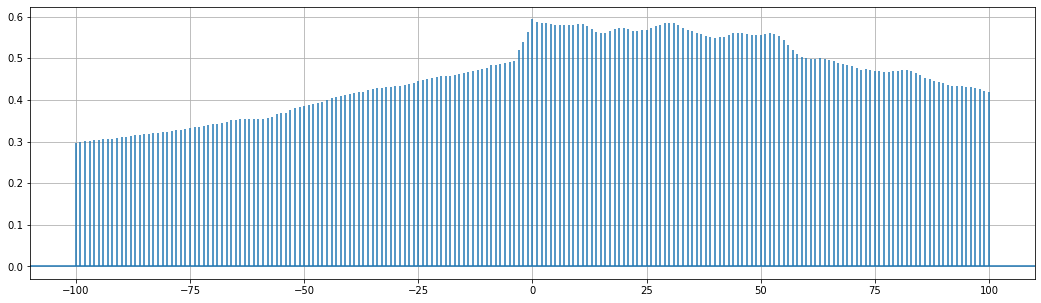

In [120]:
series_1 = data['neg_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

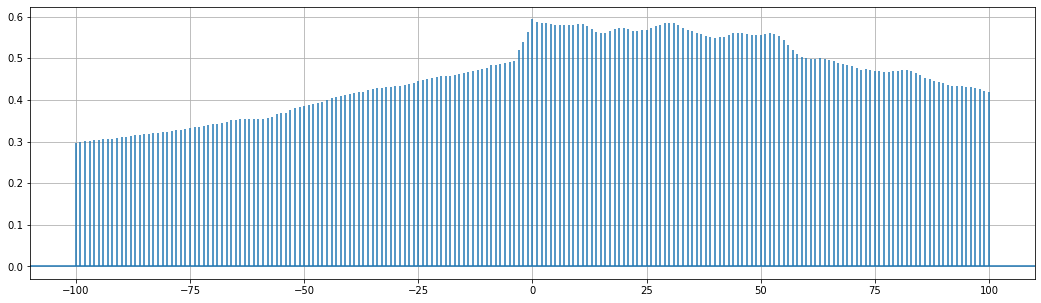

In [121]:
series_1 = data['compound_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

# Granger Causality 

In [122]:
data.columns

Index(['daily_tweets', 'neg_sentiment', 'pos_sentiment', 'compound_sentiment',
       'closing_price'],
      dtype='object')

In [113]:
input_data = np.asarray(data[['compound_sentiment', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3472  , p=0.0209  , df_denom=1407, df_num=1
ssr based chi2 test:   chi2=5.3586  , p=0.0206  , df=1
likelihood ratio test: chi2=5.3484  , p=0.0207  , df=1
parameter F test:         F=5.3472  , p=0.0209  , df_denom=1407, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3006  , p=0.1006  , df_denom=1404, df_num=2
ssr based chi2 test:   chi2=4.6175  , p=0.0994  , df=2
likelihood ratio test: chi2=4.6100  , p=0.0998  , df=2
parameter F test:         F=2.3006  , p=0.1006  , df_denom=1404, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1897  , p=0.0875  , df_denom=1401, df_num=3
ssr based chi2 test:   chi2=6.6020  , p=0.0857  , df=3
likelihood ratio test: chi2=6.5866  , p=0.0863  , df=3
parameter F test:         F=2.1897  , p=0.0875  , df_denom=1401, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2838  , p=0.

{1: ({'ssr_ftest': (5.3471881208671785, 0.020899453455995254, 1407.0, 1),
   'ssr_chi2test': (5.358589374856234, 0.020620446587103988, 1),
   'lrtest': (5.348432660153776, 0.02074090704562407, 1),
   'params_ftest': (5.347188120867327, 0.020899453455995254, 1407.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.3005752774144823, 0.10057879771167437, 1404.0, 2),
   'ssr_chi2test': (4.617536418628212, 0.09938359598067663, 2),
   'lrtest': (4.609986676383414, 0.09975946522983777, 2),
   'params_ftest': (2.300575277414512, 0.10057879771167437, 1404.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.189725741319628, 0.08747375688649232, 1401.0, 3),
   'ssr_chi2test': (6.601999665477593, 0.08572552888985653, 3),
   'lrtest': (6.586569754905213, 0.08631022111188674, 3),
   'params_ftest': (2.189725741319588, 0.08747375688649232, 1401.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0

In [115]:
input_data = np.asarray(data[['pos_sentiment', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst = True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3472  , p=0.0209  , df_denom=1407, df_num=1
ssr based chi2 test:   chi2=5.3586  , p=0.0206  , df=1
likelihood ratio test: chi2=5.3484  , p=0.0207  , df=1
parameter F test:         F=5.3472  , p=0.0209  , df_denom=1407, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3006  , p=0.1006  , df_denom=1404, df_num=2
ssr based chi2 test:   chi2=4.6175  , p=0.0994  , df=2
likelihood ratio test: chi2=4.6100  , p=0.0998  , df=2
parameter F test:         F=2.3006  , p=0.1006  , df_denom=1404, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1897  , p=0.0875  , df_denom=1401, df_num=3
ssr based chi2 test:   chi2=6.6020  , p=0.0857  , df=3
likelihood ratio test: chi2=6.5866  , p=0.0863  , df=3
parameter F test:         F=2.1897  , p=0.0875  , df_denom=1401, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2838  , p=0.

{1: ({'ssr_ftest': (5.3471881208671785, 0.020899453455995254, 1407.0, 1),
   'ssr_chi2test': (5.358589374856234, 0.020620446587103988, 1),
   'lrtest': (5.348432660153776, 0.02074090704562407, 1),
   'params_ftest': (5.347188120867327, 0.020899453455995254, 1407.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.3005752774144823, 0.10057879771167437, 1404.0, 2),
   'ssr_chi2test': (4.617536418628212, 0.09938359598067663, 2),
   'lrtest': (4.609986676383414, 0.09975946522983777, 2),
   'params_ftest': (2.300575277414512, 0.10057879771167437, 1404.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.189725741319628, 0.08747375688649232, 1401.0, 3),
   'ssr_chi2test': (6.601999665477593, 0.08572552888985653, 3),
   'lrtest': (6.586569754905213, 0.08631022111188674, 3),
   'params_ftest': (2.189725741319588, 0.08747375688649232, 1401.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0

In [116]:
input_data = np.asarray(data[['daily_tweets', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst = True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.0081 , p=0.0001  , df_denom=1407, df_num=1
ssr based chi2 test:   chi2=16.0422 , p=0.0001  , df=1
likelihood ratio test: chi2=15.9516 , p=0.0001  , df=1
parameter F test:         F=16.0081 , p=0.0001  , df_denom=1407, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.5859  , p=0.0002  , df_denom=1404, df_num=2
ssr based chi2 test:   chi2=17.2329 , p=0.0002  , df=2
likelihood ratio test: chi2=17.1284 , p=0.0002  , df=2
parameter F test:         F=8.5859  , p=0.0002  , df_denom=1404, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.4731  , p=0.0010  , df_denom=1401, df_num=3
ssr based chi2 test:   chi2=16.5013 , p=0.0009  , df=3
likelihood ratio test: chi2=16.4054 , p=0.0009  , df=3
parameter F test:         F=5.4731  , p=0.0010  , df_denom=1401, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.1414  , p=0.

{1: ({'ssr_ftest': (16.008085273561576, 6.635476276824744e-05, 1407.0, 1),
   'ssr_chi2test': (16.042217651543584, 6.19457055025723e-05, 1),
   'lrtest': (15.951644162145385, 6.498131293150668e-05, 1),
   'params_ftest': (16.008085273561104, 6.635476276826336e-05, 1407.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (8.585894100432496, 0.0001967035214772019, 1404.0, 2),
   'ssr_chi2test': (17.23294129274841, 0.00018109828801558892, 2),
   'lrtest': (17.128408003271034, 0.00019081541675042784, 2),
   'params_ftest': (8.585894100431965, 0.00019670352147730706, 1404.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (5.473086249043587, 0.0009704987545216666, 1401.0, 3),
   'ssr_chi2test': (16.501296442512572, 0.000894846201555367, 3),
   'lrtest': (16.40535047094636, 0.0009363708786623897, 3),
   'params_ftest': (5.473086249043097, 0.0009704987545223415, 1401.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0.,